<a href="https://colab.research.google.com/github/mohmmdkhosravi/git-learning/blob/main/minProject2_Khosravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

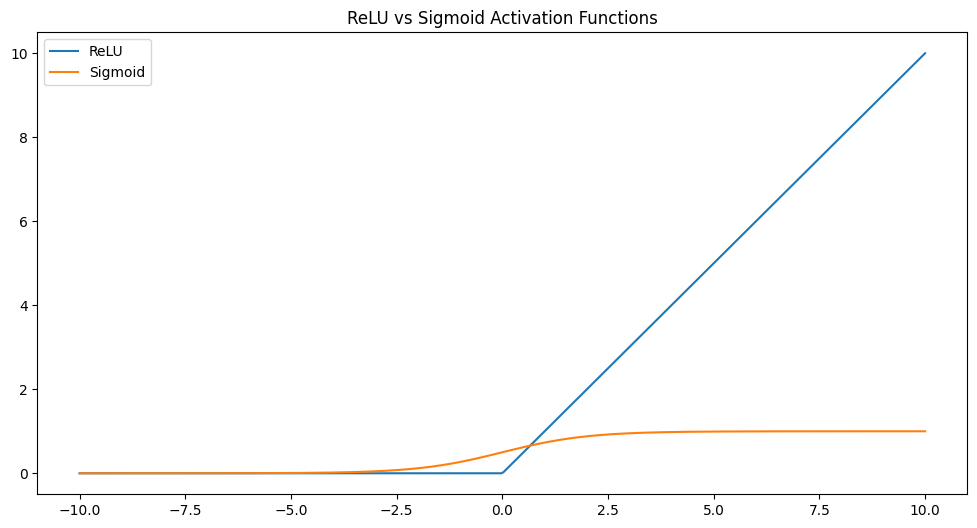

In [ ]:
#1.1

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 400)
relu_output = relu(x)
sigmoid_output = sigmoid(x)

plt.figure(figsize=(12, 6))
plt.plot(x, relu_output, label='ReLU')
plt.plot(x, sigmoid_output, label='Sigmoid')
plt.legend()
plt.title('ReLU vs Sigmoid Activation Functions')
plt.show()


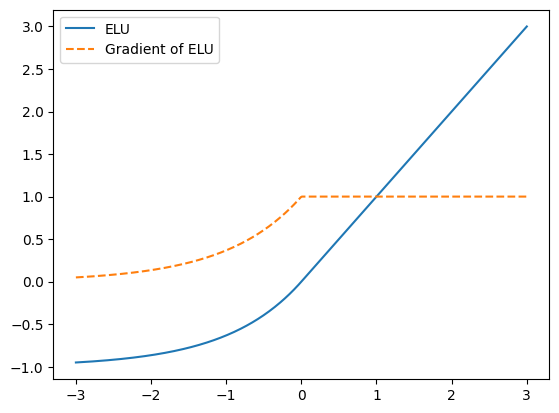

In [ ]:
#1.2

import numpy as np
import matplotlib.pyplot as plt

def ELU(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def ELU_derivative(x, alpha=1.0):
    return np.where(x >= 0, 1, alpha * np.exp(x))

x = np.linspace(-3, 3, 400)
y = ELU(x)
dy = ELU_derivative(x)

plt.plot(x, y, label='ELU')
plt.plot(x, dy, label='Gradient of ELU', linestyle='--')
plt.legend()
plt.show()


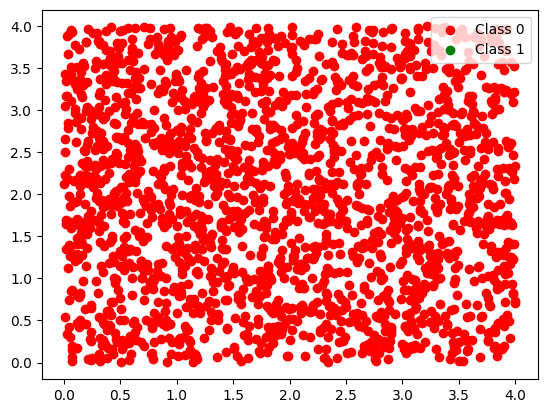

In [ ]:
#1.3

import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.where(x >= 0, 1, 0)

weights = np.array([[-1, 1], [1, 0], [0, -1]])
biases = np.array([0, -1, 0])

points = np.random.rand(2000, 2) * 4
outputs = step(np.dot(points, weights.T) + biases)

points_class_1 = points[np.all(outputs == 1, axis=1)]
points_class_0 = points[np.any(outputs == 0, axis=1)]

plt.scatter(points_class_0[:, 0], points_class_0[:, 1], color='red', label='Class 0')
plt.scatter(points_class_1[:, 0], points_class_1[:, 1], color='green', label='Class 1')
plt.legend()
plt.show()


In [ ]:
#2.1
import scipy.io
import numpy as np

# بارگیری داده‌ها از فایل‌های .mat
data_files = {
    "normal": ['/content/100.mat', '/content/97.mat', '/content/98.mat', '/content/99.mat'],
    "unnormal": ['/content/108.mat', '/content/107.mat', '/content/106.mat', '/content/105.mat']
}

# تابع برای استخراج داده‌ها از فایل‌های .mat
def load_data(files):
    data = []
    for file in files:
        mat = scipy.io.loadmat(file)
        for key in mat:
            if '__' not in key:  # نام متغیر اصلی را پیدا کنیم
                data.append(mat[key])
    return data

# بارگیری داده‌های نرمال و غیرنرمال
normal_data = load_data(data_files['normal'])
unnormal_data = load_data(data_files['unnormal'])

# تبدیل داده‌های نرمال و غیرنرمال به آرایه‌های numpy
X_normal = np.concatenate(normal_data, axis=0)
X_unnormal = np.concatenate(unnormal_data, axis=0)

# برچسب‌گذاری داده‌ها: 0 برای نرمال و 1 برای غیرنرمال
y_normal = np.zeros(X_normal.shape[0])
y_unnormal = np.ones(X_unnormal.shape[0])

# ترکیب داده‌ها و برچسب‌ها
X = np.concatenate([X_normal, X_unnormal], axis=0)
y = np.concatenate([y_normal, y_unnormal], axis=0)

# نمایش ابعاد داده‌ها
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


Data shape: (5829834, 1)
Labels shape: (5829834,)


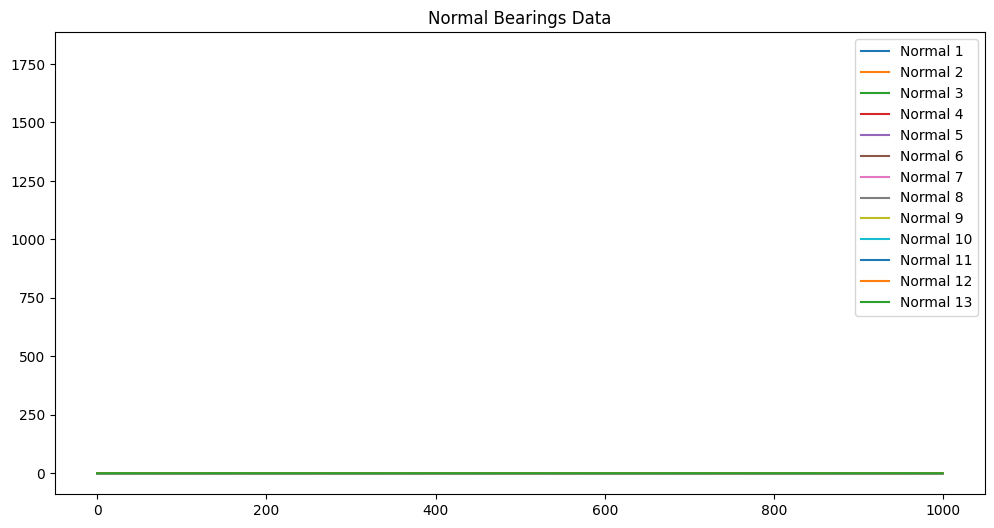

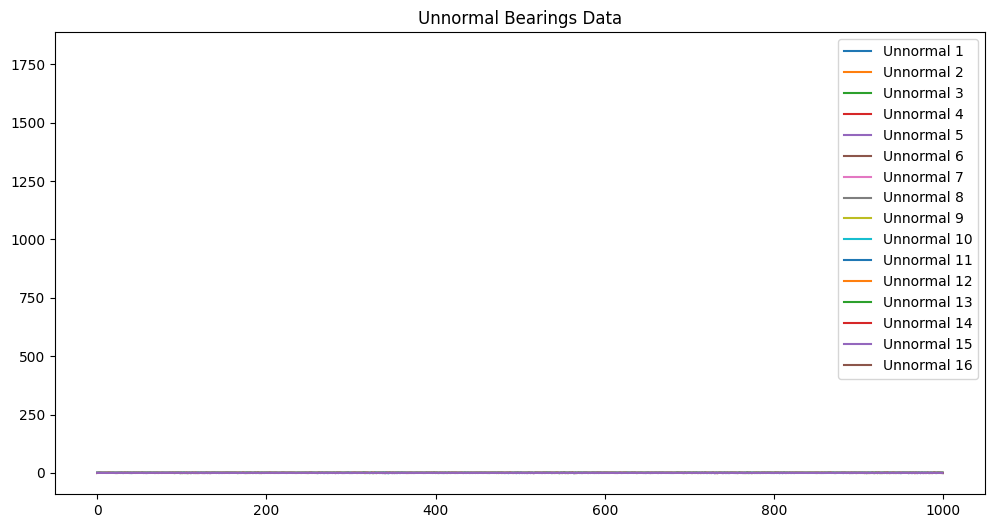

In [ ]:
#2.2


import matplotlib.pyplot as plt

# نمایش داده‌های نرمال
plt.figure(figsize=(12, 6))
for i, data in enumerate(normal_data):
    plt.plot(data[:1000], label=f'Normal {i+1}')
plt.legend()
plt.title('Normal Bearings Data')
plt.show()

# نمایش داده‌های غیرنرمال
plt.figure(figsize=(12, 6))
for i, data in enumerate(unnormal_data):
    plt.plot(data[:1000], label=f'Unnormal {i+1}')
plt.legend()
plt.title('Unnormal Bearings Data')
plt.show()


In [ ]:
#2.3

import scipy.io
import numpy as np

# بارگیری داده‌ها از فایل‌های .mat
data_files = {
    "normal": ['/content/100.mat', '/content/97.mat', '/content/98.mat', '/content/99.mat'],
    "unnormal": ['/content/108.mat', '/content/107.mat', '/content/106.mat', '/content/105.mat']
}

# تابع برای استخراج داده‌ها از فایل‌های .mat
def load_data(files):
    data = []
    for file in files:
        mat = scipy.io.loadmat(file)
        for key in mat:
            if '__' not in key:  # نام متغیر اصلی را پیدا کنیم
                data.append(mat[key])
    return data

# بارگیری داده‌های نرمال و غیرنرمال
normal_data = load_data(data_files['normal'])
unnormal_data = load_data(data_files['unnormal'])

# بررسی تعداد نمونه‌ها در داده‌ها
print("Number of samples in normal data files:", [data.shape for data in normal_data])
print("Number of samples in unnormal data files:", [data.shape for data in unnormal_data])

# ترکیب داده‌های نرمال و غیرنرمال
X_normal = np.concatenate(normal_data, axis=0)
X_unnormal = np.concatenate(unnormal_data, axis=0)

# ایجاد برچسب‌ها: 0 برای نرمال و 1 برای غیرنرمال
y_normal = np.zeros(X_normal.shape[0])
y_unnormal = np.ones(X_unnormal.shape[0])

# ترکیب داده‌ها و برچسب‌ها
X = np.concatenate([X_normal, X_unnormal], axis=0)
y = np.concatenate([y_normal, y_unnormal], axis=0)

# بررسی ابعاد نهایی داده‌ها و برچسب‌ها
print("Combined data shape:", X.shape)
print("Combined labels shape:", y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# تقسیم داده‌ها به بخش‌های آموزش، اعتبارسنجی و تست
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ساخت مدل MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# پیش‌بینی و محاسبه دقت
y_train_pred = mlp.predict(X_train)
y_val_pred = mlp.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# تست مدل
y_test_pred = mlp.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Number of samples in normal data files: [(485643, 1), (485643, 1), (1, 1), (243938, 1), (243938, 1), (1, 1), (483903, 1), (483903, 1), (1, 1), (483903, 1), (483903, 1), (485063, 1), (485063, 1)]
Number of samples in unnormal data files: [(122917, 1), (122917, 1), (122917, 1), (1, 1), (122136, 1), (122136, 1), (122136, 1), (1, 1), (121991, 1), (121991, 1), (121991, 1), (1, 1), (121265, 1), (121265, 1), (121265, 1), (1, 1)]
Combined data shape: (5829834, 1)
Combined labels shape: (5829834,)


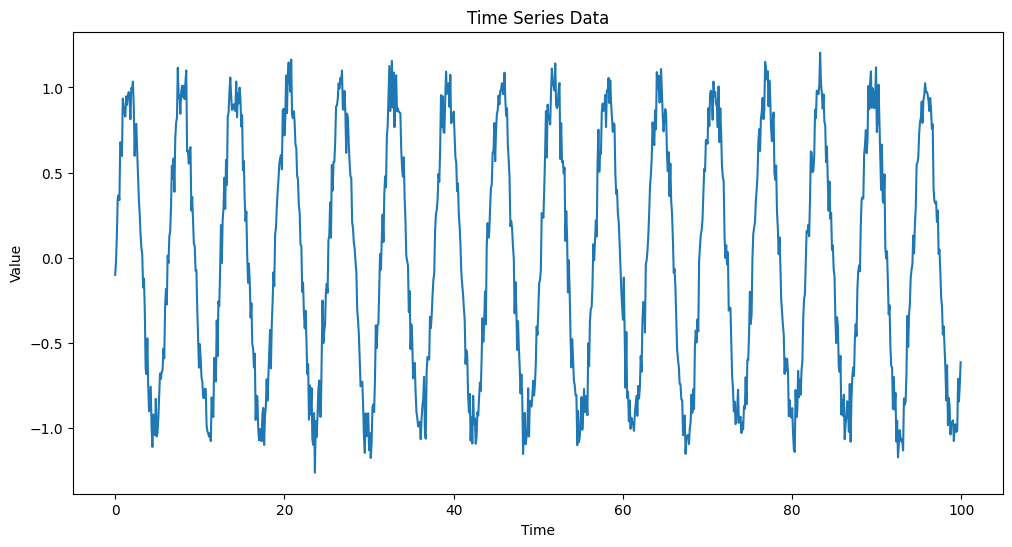

In [ ]:
#3.1

import numpy as np
import matplotlib.pyplot as plt

# فرض داده‌های سری زمانی
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(0, 0.1, len(time))

plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
#3.2

from scipy.stats import kurtosis, skew

# استخراج ویژگی‌ها
mean_val = np.mean(data)
std_val = np.std(data)
max_val = np.max(data)
min_val = np.min(data)
kurtosis_val = kurtosis(data)
skew_val = skew(data)

print(f'Mean: {mean_val}')
print(f'Standard Deviation: {std_val}')
print(f'Max: {max_val}')
print(f'Min: {min_val}')
print(f'Kurtosis: {kurtosis_val}')
print(f'Skew: {skew_val}')


Mean: 0.0003002172347721306
Standard Deviation: 0.7193823226235395
Max: 1.2043050853640773
Min: -1.2633813948289463
Kurtosis: -1.448820968089733
Skew: -0.017649091317739916


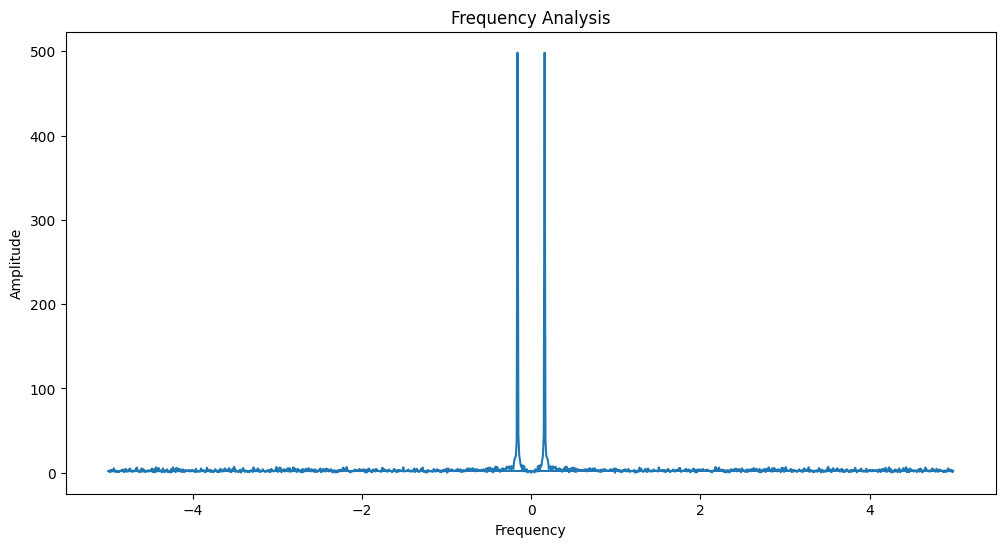

In [ ]:
#3.3

from scipy.fft import fft

# تبدیل فوریه
fft_values = fft(data)
frequencies = np.fft.fftfreq(len(data), d=0.1)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_values))
plt.title('Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
#4

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

texts = ["This is a positive text", "This is a negative text", "Another positive text"]
labels = [1, 0, 1]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy:", accuracy)



Confusion Matrix:
 [[0 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.